# Insurance price prediction using neural network 

##### Data analysis with seaborn and matplotlib. Neural network built with keras and linear regression with sklearn
##### DataSet https://www.kaggle.com/mirichoi0218/insurance 


### Imports

In [134]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Load file 

In [135]:
insurance_df = pd.read_csv("insurance.csv")

### Data overview

In [136]:
print("There are {:,} observations and {} columns in the data set.".format(insurance_df.shape[0], insurance_df.shape[1]))
print("There are {} missing values in the data.".format(insurance_df.isna().sum().sum()))

There are 1,338 observations and 7 columns in the data set.
There are 0 missing values in the data.


In [137]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [138]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [139]:
cat=insurance_df.select_dtypes(include=['object']).columns.tolist()
for i in cat:
    obs=insurance_df[i].value_counts()
    avg_cost=insurance_df.groupby(i)["charges"].mean()
    display(pd.DataFrame({"Number of policy holders":obs, "Average Cost":avg_cost.map('${:,.2f}'.format)})\
            .sort_values('Number of policy holders', ascending=False)\
            .style.set_caption("Variable: {}".format(i)))

,Number of policy holders,Average Cost
male,676,"$13,956.75"
female,662,"$12,569.58"


,Number of policy holders,Average Cost
no,1064,"$8,434.27"
yes,274,"$32,050.23"


,Number of policy holders,Average Cost
southeast,364,"$14,735.41"
northwest,325,"$12,417.58"
southwest,325,"$12,346.94"
northeast,324,"$13,406.38"


### Exploratory Data Analysis 

In [140]:
cols = insurance_df.columns

num_cols = insurance_df._get_numeric_data().columns
num_cols

categorical_col = list(set(cols) - set(num_cols))
categorical_col,num_cols

(['smoker', 'region', 'sex'],
 Index(['age', 'bmi', 'children', 'charges'], dtype='object'))

<AxesSubplot:xlabel='sex', ylabel='charges'>

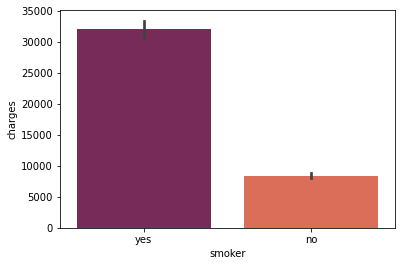

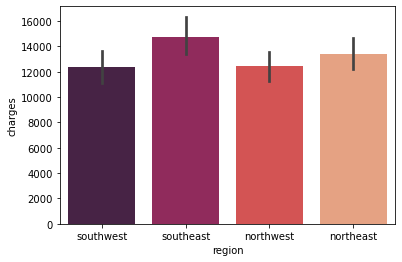

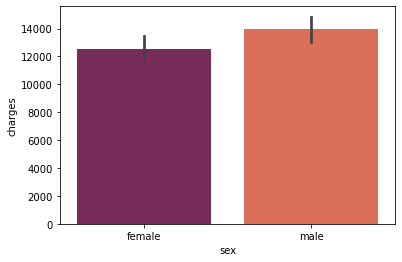

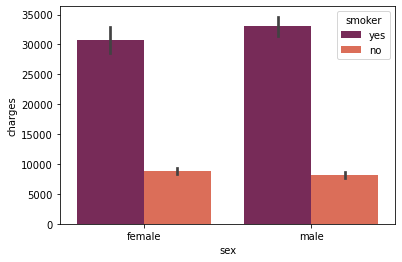

In [141]:
for i in categorical_col:
    plt.figure()
    sns.barplot(x=i,y='charges',data=insurance_df,palette="rocket")
plt.figure()
sns.barplot(x='sex',y='charges',hue='smoker',data=insurance_df,palette='rocket')

##### Based on the data analysis we can see that smoking has big impact on charge, male tend to be charged more than woman. The region which have the most charges is the southeast

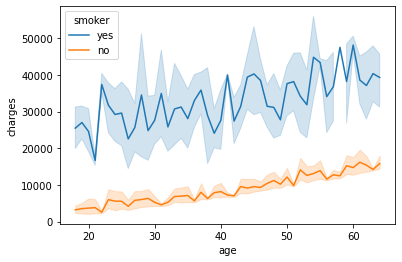

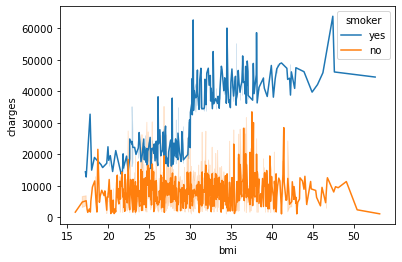

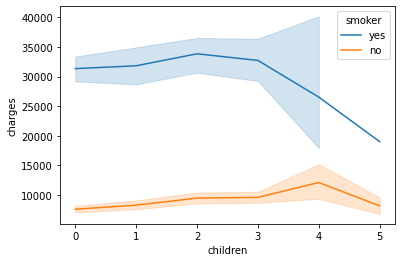

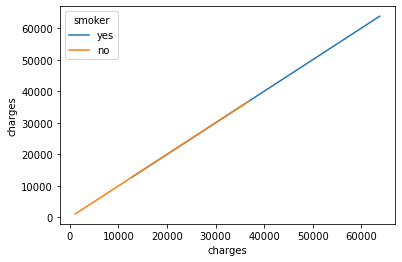

In [142]:
for i in num_cols:
    plt.figure()
    sns.lineplot(data=insurance_df, x=i, y="charges",hue='smoker')

<AxesSubplot:>

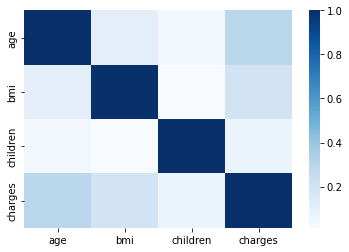

In [143]:
sns.heatmap(insurance_df.corr(),cmap="Blues")

##### We can observe that the charge tend to increase with age. People with more than one children are charged less than people with one children. 

### Data preparation for model traning 

In [144]:
#  Transform colum
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown="ignore"),['sex','smoker','region'])
)

# Define X and Y 
X = insurance_df.iloc[:,0:6]
y = insurance_df.iloc[:,6]

# Train and input data split 
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

ct.fit(x_train)

# Transform training and test data with normalization
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)


## Neural network 

### Neural network model 

In [145]:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1),
])

### Compile model 

In [146]:
model.compile(loss='mae',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['mae'])

history = model.fit(x_train_normal,
                        y_train,
                        epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13345.8545 - mae: 13345.8545
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13344.7764 - mae: 13344.7764
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13342.9521 - mae: 13342.9521
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13339.5586 - mae: 13339.5586
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13333.4863 - mae: 13333.4863
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13323.4375 - mae: 13323.4375
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 13308.1729 - mae: 13308.1729
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 13286.5850 - mae: 13286.5850
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 13257.6631 - mae: 13257.6631
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 13220.36

34/34 [==============================] - 0s 1ms/step - loss: 7335.0864 - mae: 7335.0864
Epoch 82/200
34/34 [==============================] - 0s 2ms/step - loss: 7314.9897 - mae: 7314.9897
Epoch 83/200
34/34 [==============================] - 0s 1ms/step - loss: 7294.5952 - mae: 7294.5952
Epoch 84/200
34/34 [==============================] - 0s 1ms/step - loss: 7274.3540 - mae: 7274.3540
Epoch 85/200
34/34 [==============================] - 0s 1ms/step - loss: 7253.0977 - mae: 7253.0977
Epoch 86/200
34/34 [==============================] - 0s 1ms/step - loss: 7232.2056 - mae: 7232.2056
Epoch 87/200
34/34 [==============================] - 0s 1ms/step - loss: 7211.0698 - mae: 7211.0698
Epoch 88/200
34/34 [==============================] - 0s 1ms/step - loss: 7189.6011 - mae: 7189.6011
Epoch 89/200
34/34 [==============================] - 0s 1ms/step - loss: 7167.9951 - mae: 7167.9951
Epoch 90/200
34/34 [==============================] - 0s 2ms/step - loss: 7145.4302 - mae: 7145.4302
Epo

34/34 [==============================] - 0s 1ms/step - loss: 4188.4355 - mae: 4188.4355
Epoch 162/200
34/34 [==============================] - 0s 1ms/step - loss: 4141.7642 - mae: 4141.7642
Epoch 163/200
34/34 [==============================] - 0s 1ms/step - loss: 4100.3921 - mae: 4100.3921
Epoch 164/200
34/34 [==============================] - 0s 1ms/step - loss: 4059.0588 - mae: 4059.0588
Epoch 165/200
34/34 [==============================] - 0s 1ms/step - loss: 4021.1887 - mae: 4021.1887
Epoch 166/200
34/34 [==============================] - 0s 1ms/step - loss: 3984.8772 - mae: 3984.8772
Epoch 167/200
34/34 [==============================] - 0s 1ms/step - loss: 3950.6384 - mae: 3950.6384
Epoch 168/200
34/34 [==============================] - 0s 1ms/step - loss: 3920.1006 - mae: 3920.1006
Epoch 169/200
34/34 [==============================] - 0s 1ms/step - loss: 3890.2898 - mae: 3890.2898
Epoch 170/200
34/34 [==============================] - 0s 1ms/step - loss: 3864.5107 - mae: 3864

### Model evaluation 

Text(0.5, 0, 'epochs')

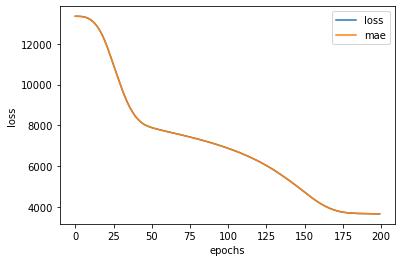

In [147]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Linear regression 

### Model

In [148]:
x_train_regression,x_test_regression,y_train_regression,y_test_regression = train_test_split(X,y,test_size=0.10,random_state=101)

x_train_regression_normal = ct.transform(x_train_regression)
x_test_regression_normal = ct.transform(x_test_regression)

In [149]:
# Train model
linReg = LinearRegression()
linReg.fit(x_train_regression_normal,y_train_regression) 
predictions = linReg.predict(x_test_regression_normal)

In [150]:
linReg.score(x_test_regression_normal,y_test_regression)

0.7167334868832818

In [151]:
linReg.score(x_train_regression_normal,y_train_regression)

0.7545037304745374

In [152]:
print('MAE:', metrics.mean_absolute_error(y_test_regression, predictions))
print('MSE:', metrics.mean_squared_error(y_test_regression, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_regression, predictions)))

MAE: 4590.390959651812
MSE: 43118749.198145196
RMSE: 6566.486823115173
